Import the tidyverse.

In [1]:
library('tidyverse')
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Bars

Let's use the "diamonds" data set. Preview the first five rows of the diamonds dataset using the `head` function.  
(*Hint: try* `?head` *to get the help page for the* `head` *function*)

In [2]:
diamonds |> head()

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [2]:
diamonds |> dim()

[1] 53940    10

Make a bar chart of the "cut" column. About how many rows are there for the cut category "Ideal"?

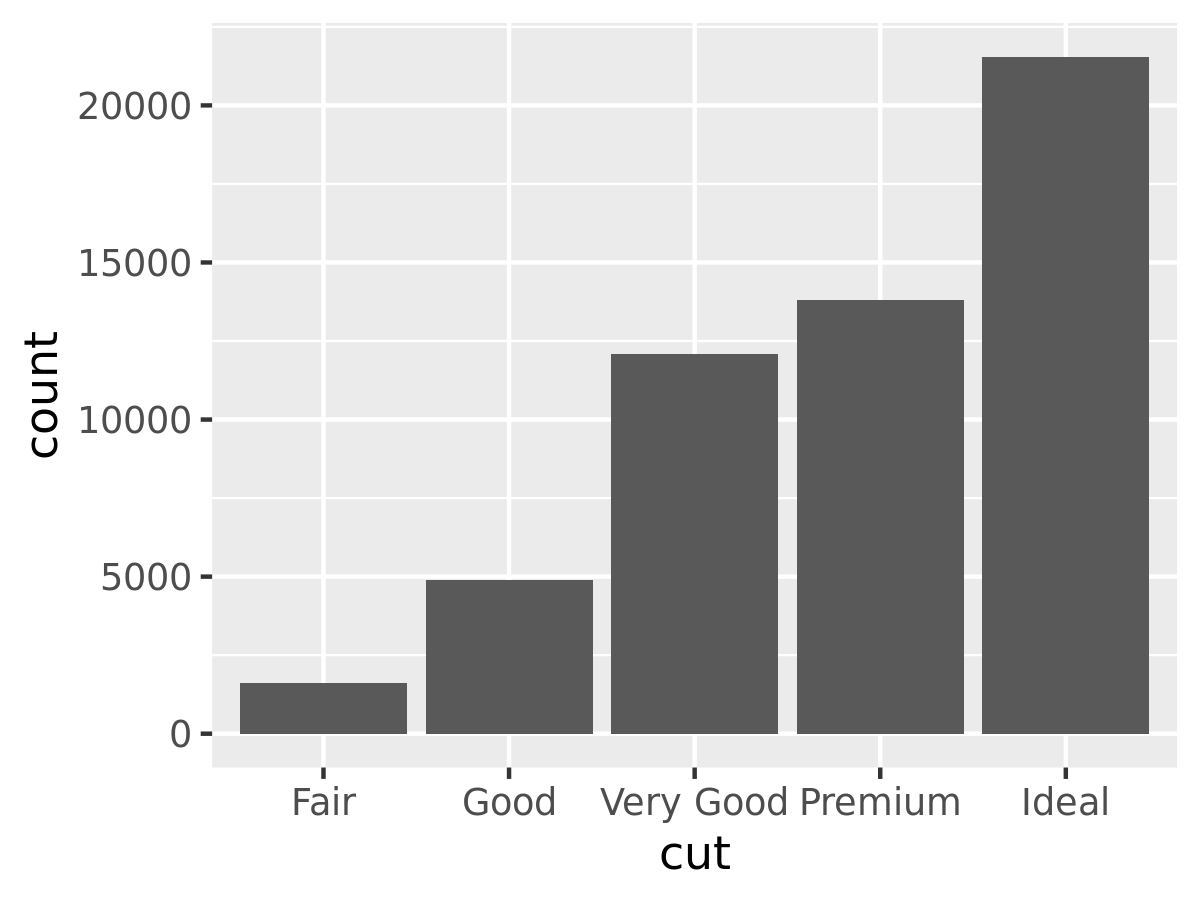

In [5]:
p = ggplot(diamonds, aes(x = cut))

p = p + geom_bar()

p           
           

Use `coord_flip` to rotate the chart by 90 degrees. 

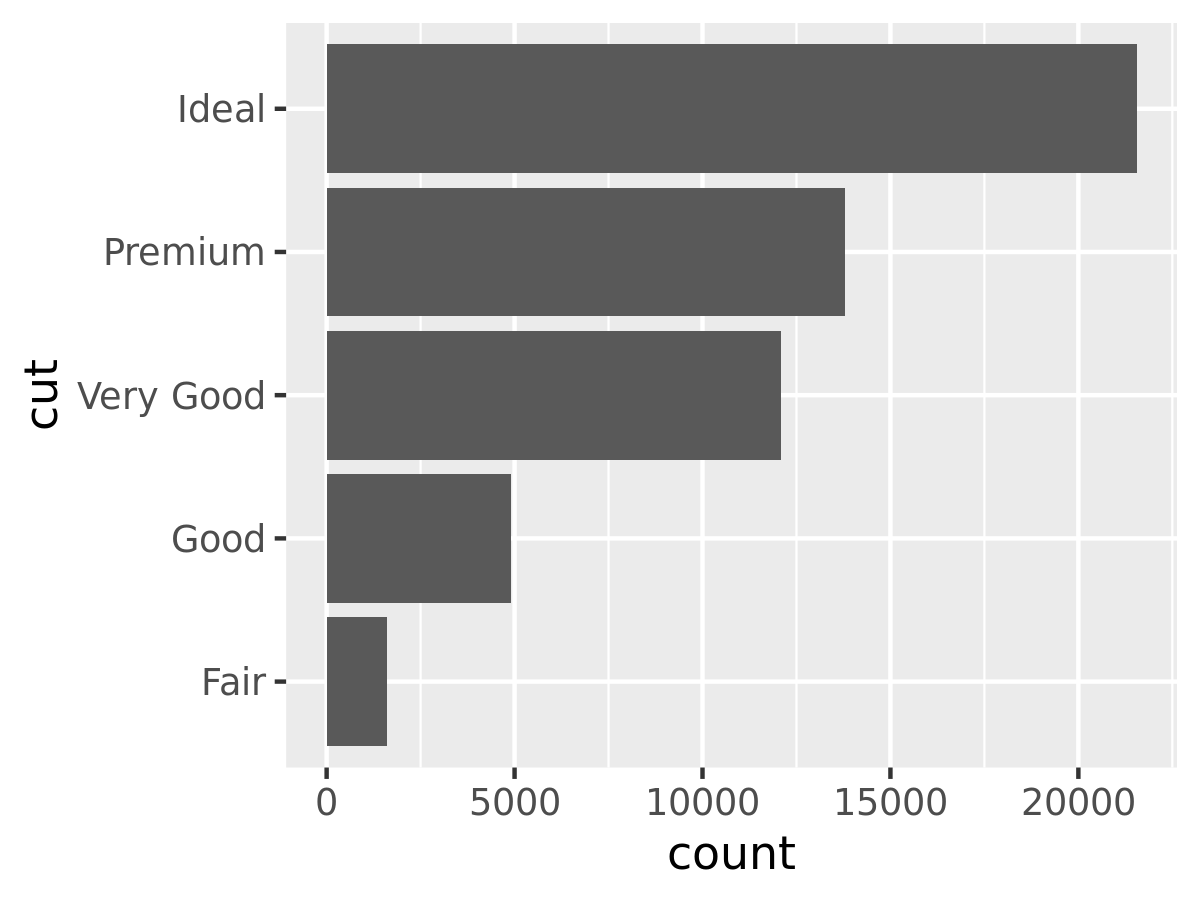

In [6]:
p = ggplot(diamonds, aes(x = cut))

p = p + geom_bar()

p = p + coord_flip()

p

#instead of coord_flip, can also switch x to y

# Lines

We'll use flight data from the Bureau of Transportation Statistics
https://www.transtats.bts.gov/DatabaseInfo.asp?DB_ID=120&Link=0

In [3]:
flight.data = read_csv('https://www.openintro.org/book/statdata/nycflights.csv')

flight.data |> head()# uncomment the following:

library(nycflights13)
flight.data = flights %>%
group_by(month, carrier, year) %>%
summarize(N_flights = n()) %>%
filter(carrier %in% c('UA', 'AA', 'US'))

Rows: 32735 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): carrier, tailnum, origin, dest
dbl (12): year, month, day, dep_time, dep_delay, arr_time, arr_delay, flight...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40
2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57
2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59
2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41
2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2
2013,1,1,1817,-3,2008,3,AA,N3AXAA,353,LGA,ORD,138,733,18,17


`summarise()` has grouped output by 'month', 'carrier'. You can override using
the `.groups` argument.


What are the columns in `flight.data`? (*Hint: preview the table*)

In [8]:
flight.data |> head()

year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40
2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57
2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59
2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41
2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2
2013,1,1,1817,-3,2008,3,AA,N3AXAA,353,LGA,ORD,138,733,18,17


First, make a bar chart of the `carrier` column? Does this make sense?

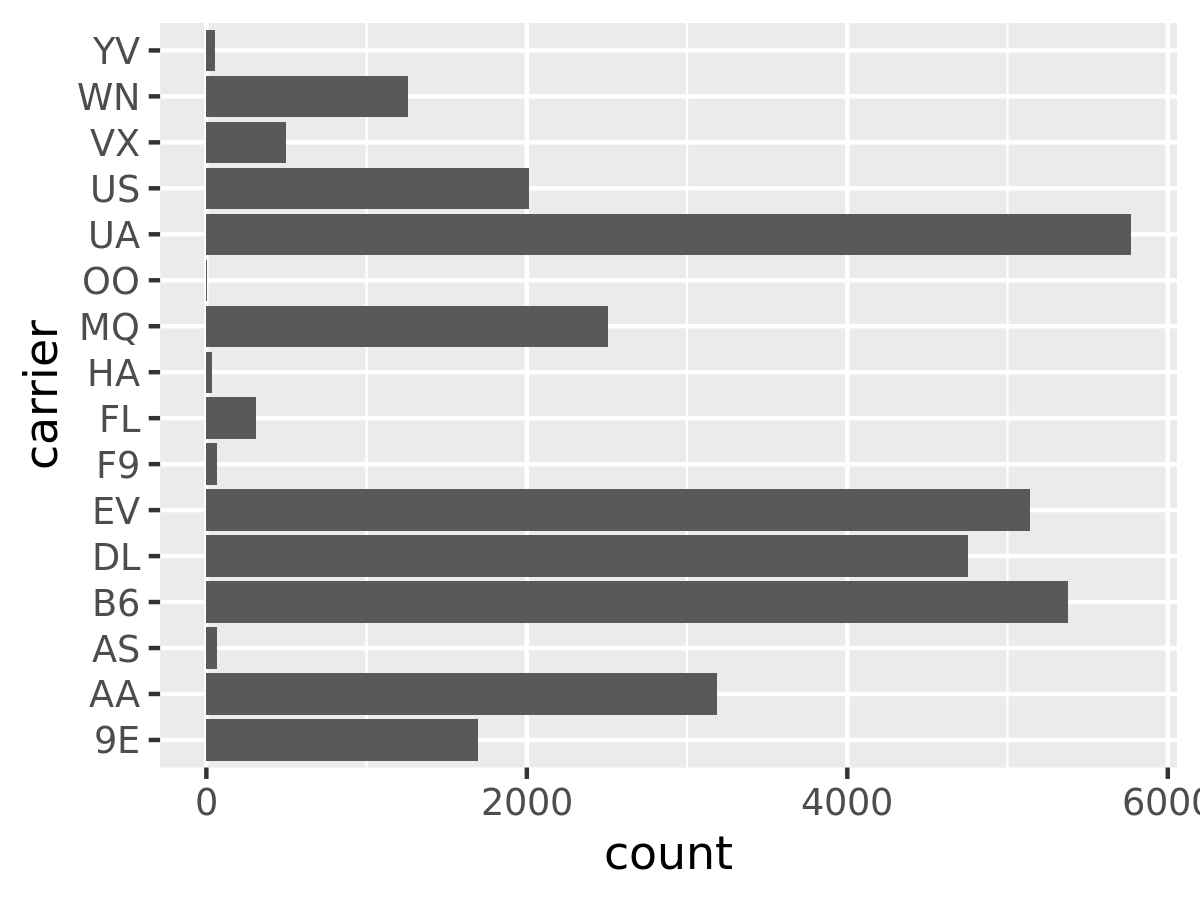

In [10]:
p = ggplot(flight.data, aes(y = carrier))

p = p + geom_bar()

p

Plot month versus number of flights grouped according to carrier.

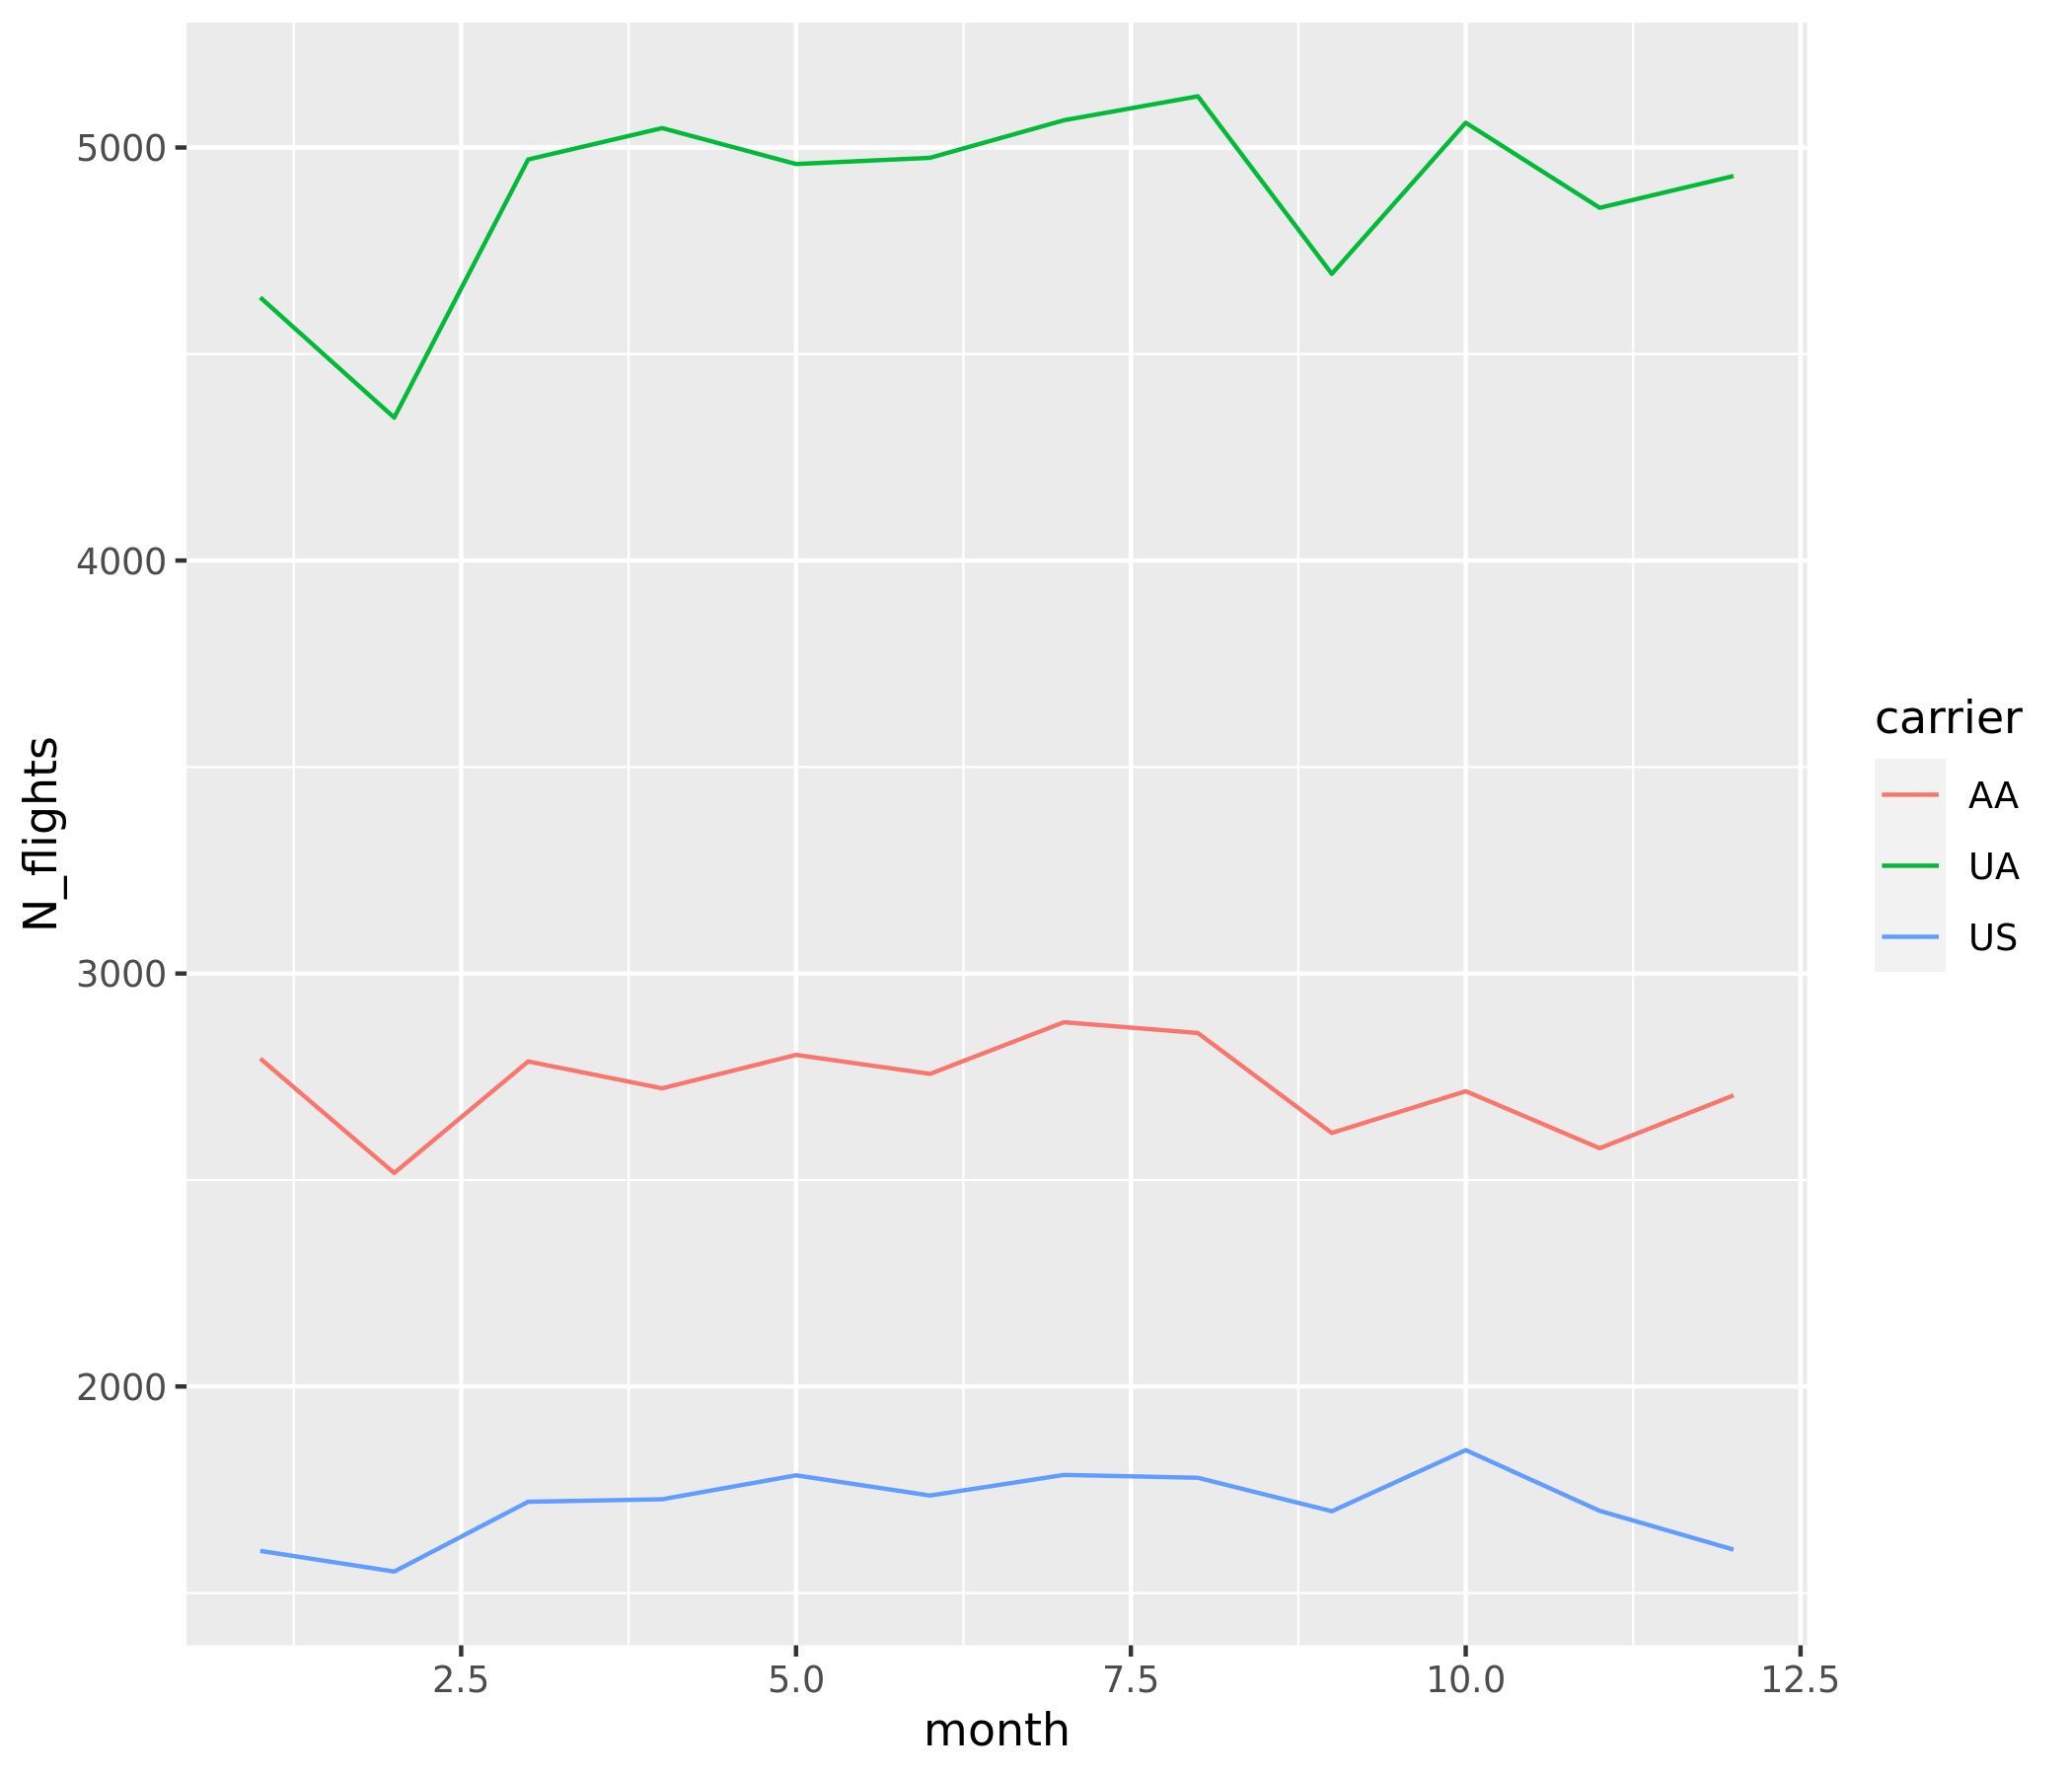

In [16]:
p = ggplot(flight.data, aes(x = month, y = N_flights, color = carrier))

p = p + geom_line()

p

# Smooth

Plot a scatter plot (`geom_point`) of carat versus price with the diamonds dataset.

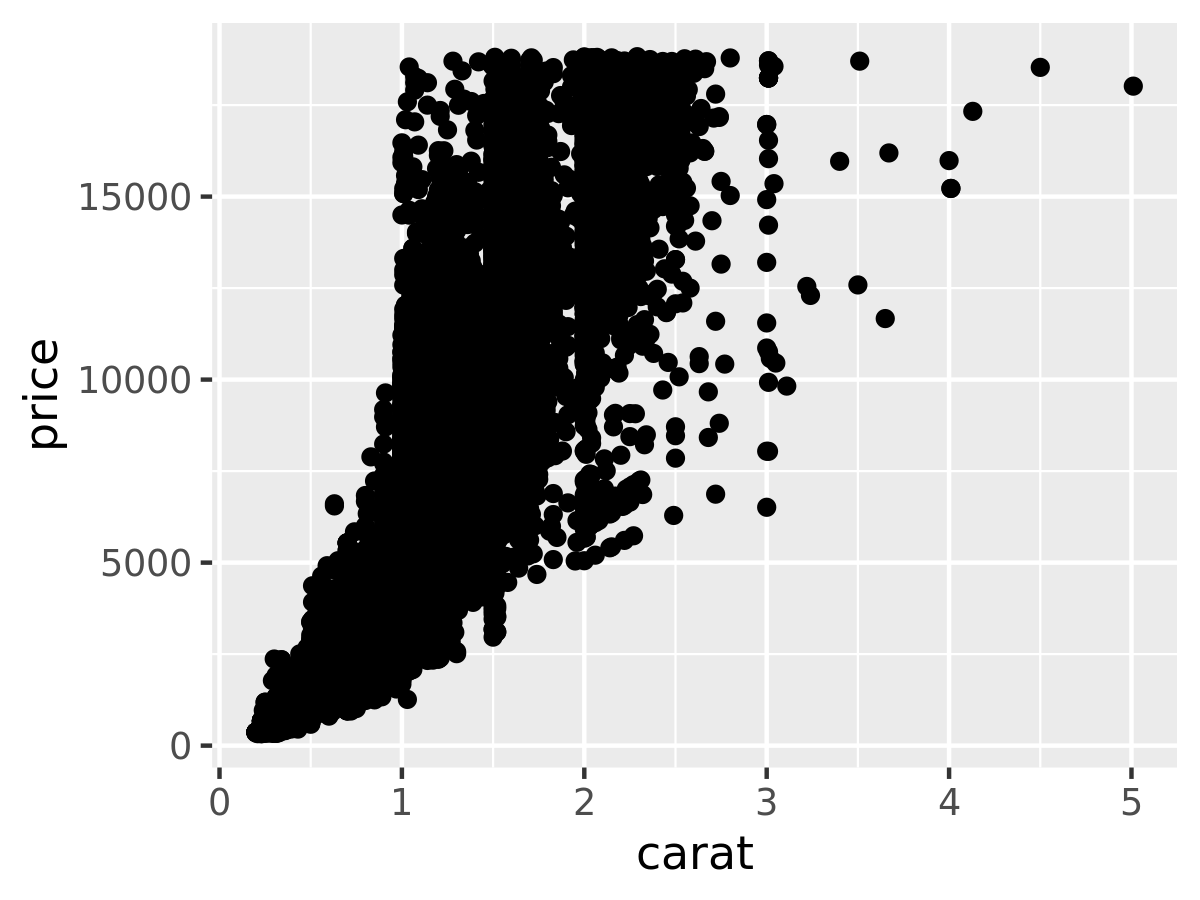

In [8]:
p = ggplot(diamonds, aes(x = carat, y = price))

p = p + geom_point()

p

There is a lot of overplotting in this figure. Make the same plot but use the `alpha` value to reduce
the opacity of the points.  
(*Hint: alpha values can be set from 0 (transparent) to 1 (opaque)*)

Warning message in geom_point(aplha = 0.2):
“Ignoring unknown parameters: `aplha`”


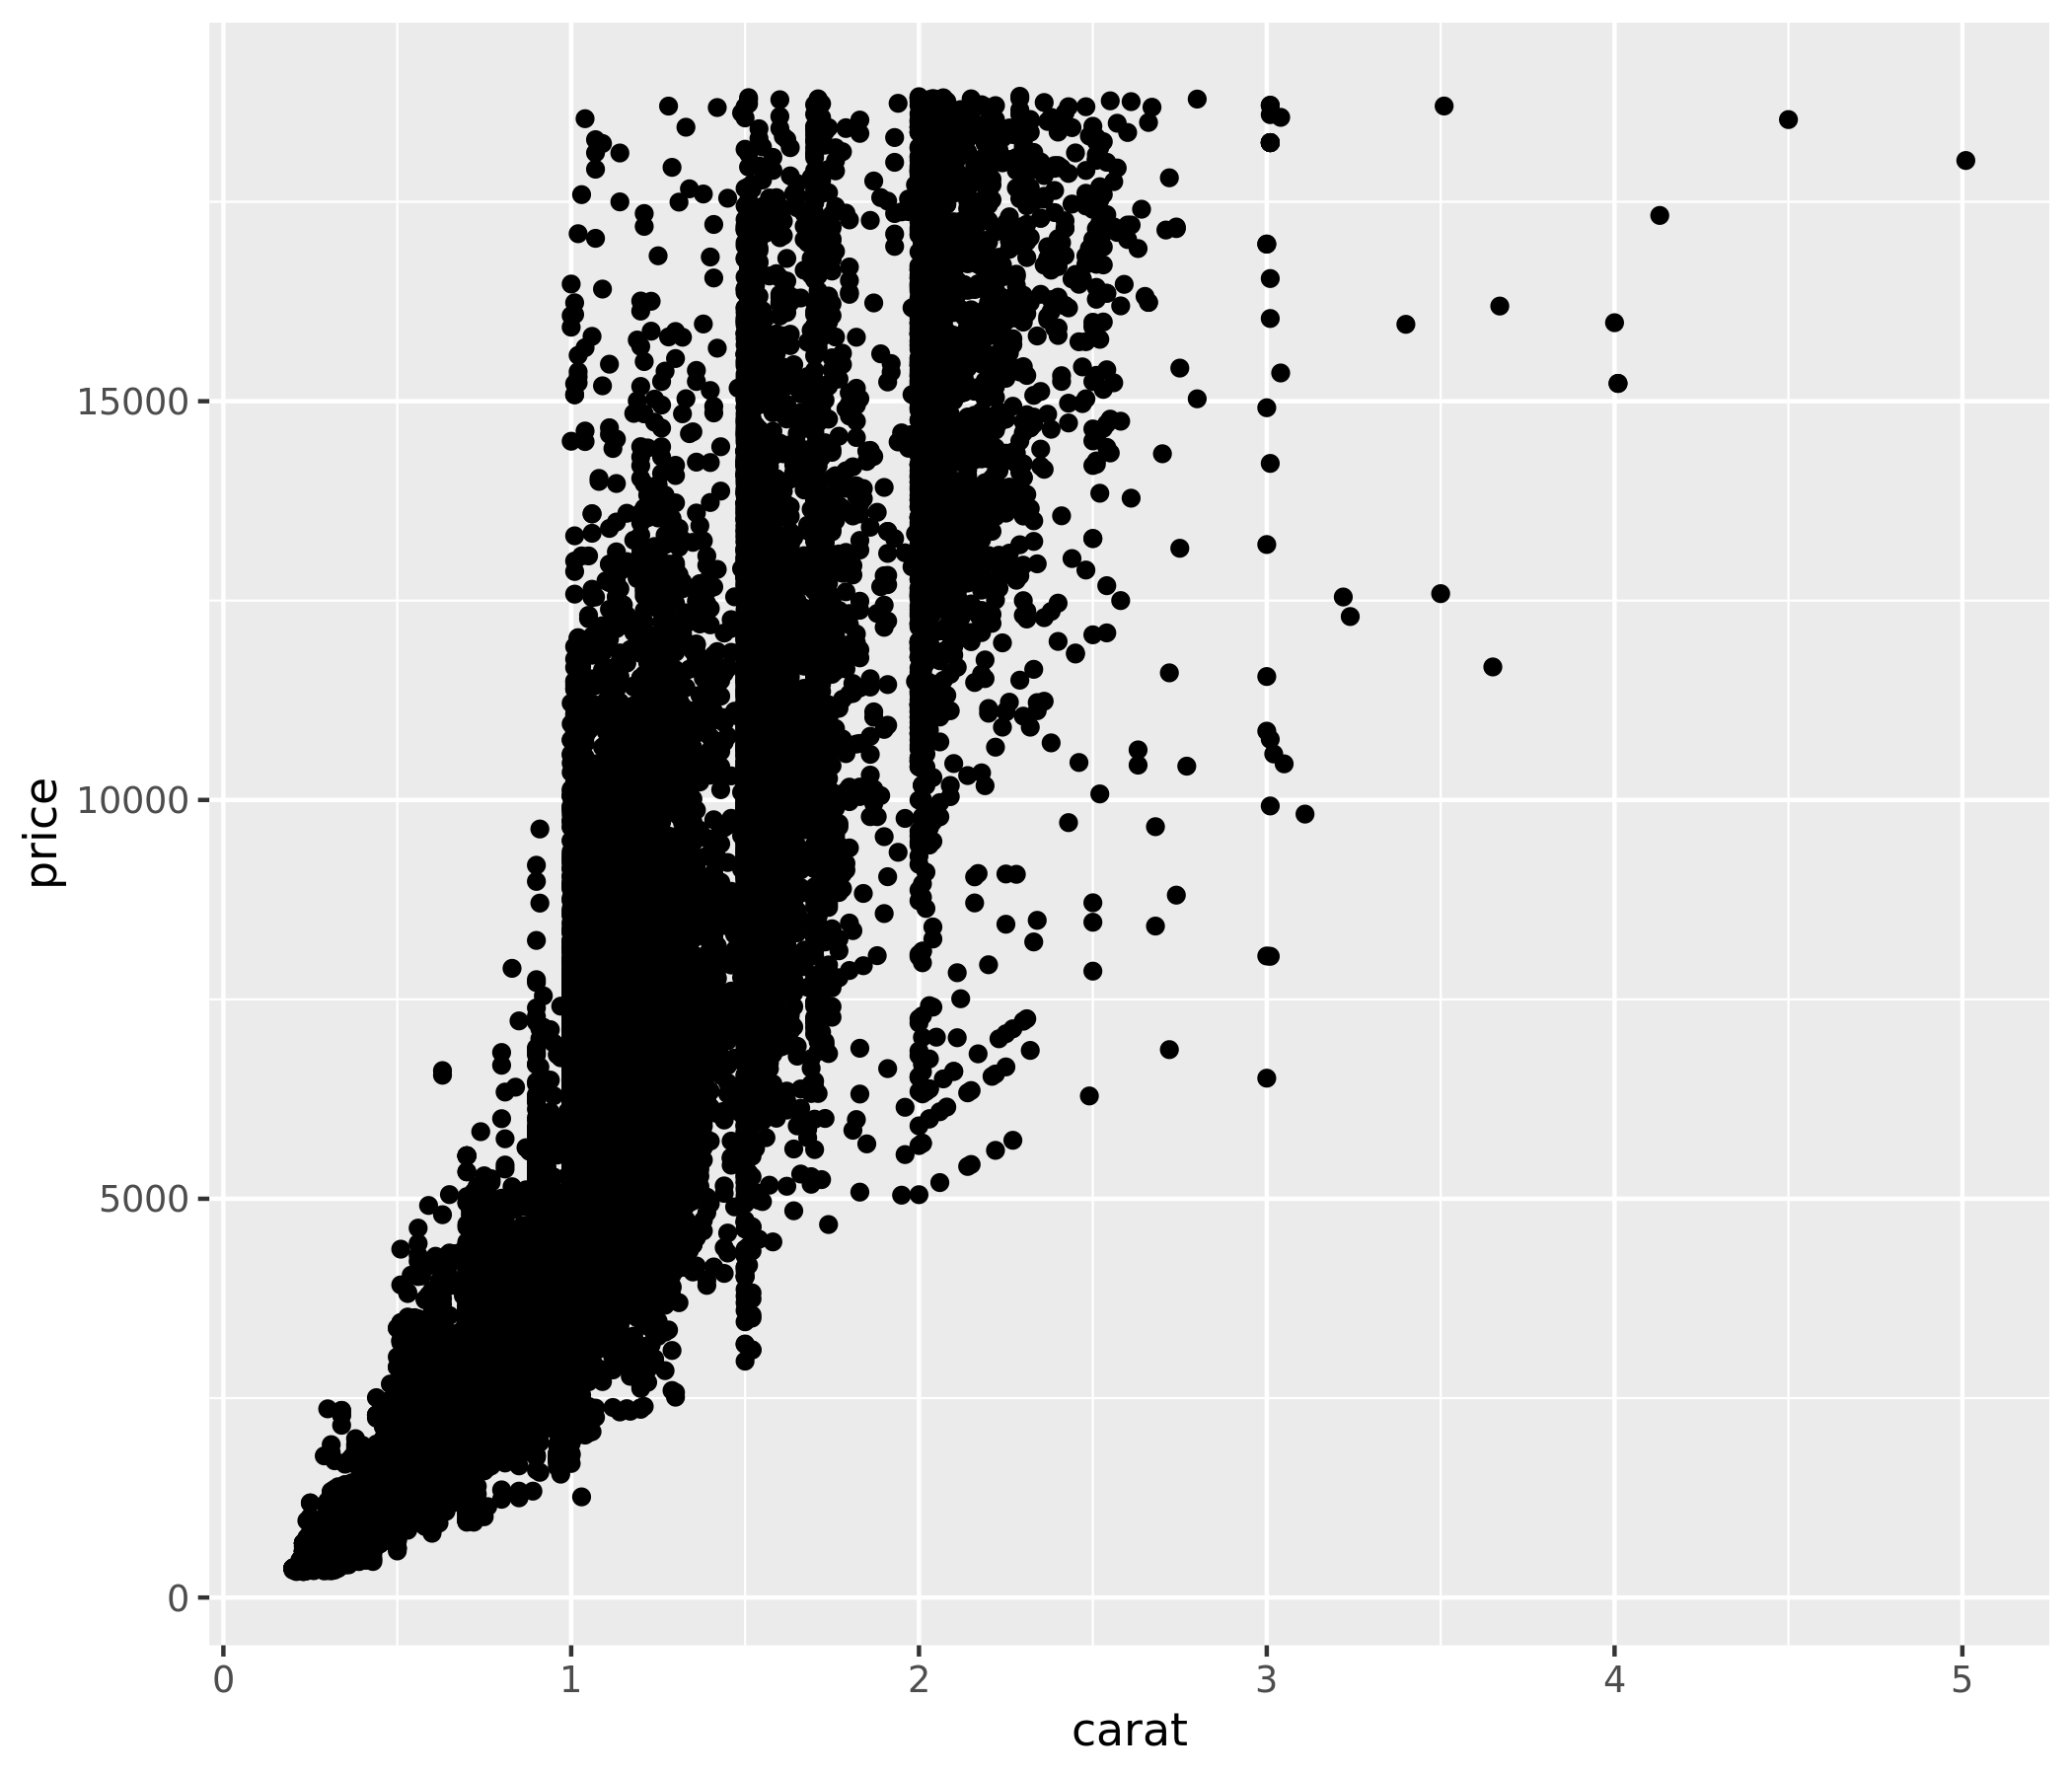

In [21]:
p = ggplot(diamonds, aes(x = carat, y = price))

p = p + geom_point(aplha = 0.2)

p

Facetting can also help with overplotting. Facet the chart by `cut`.

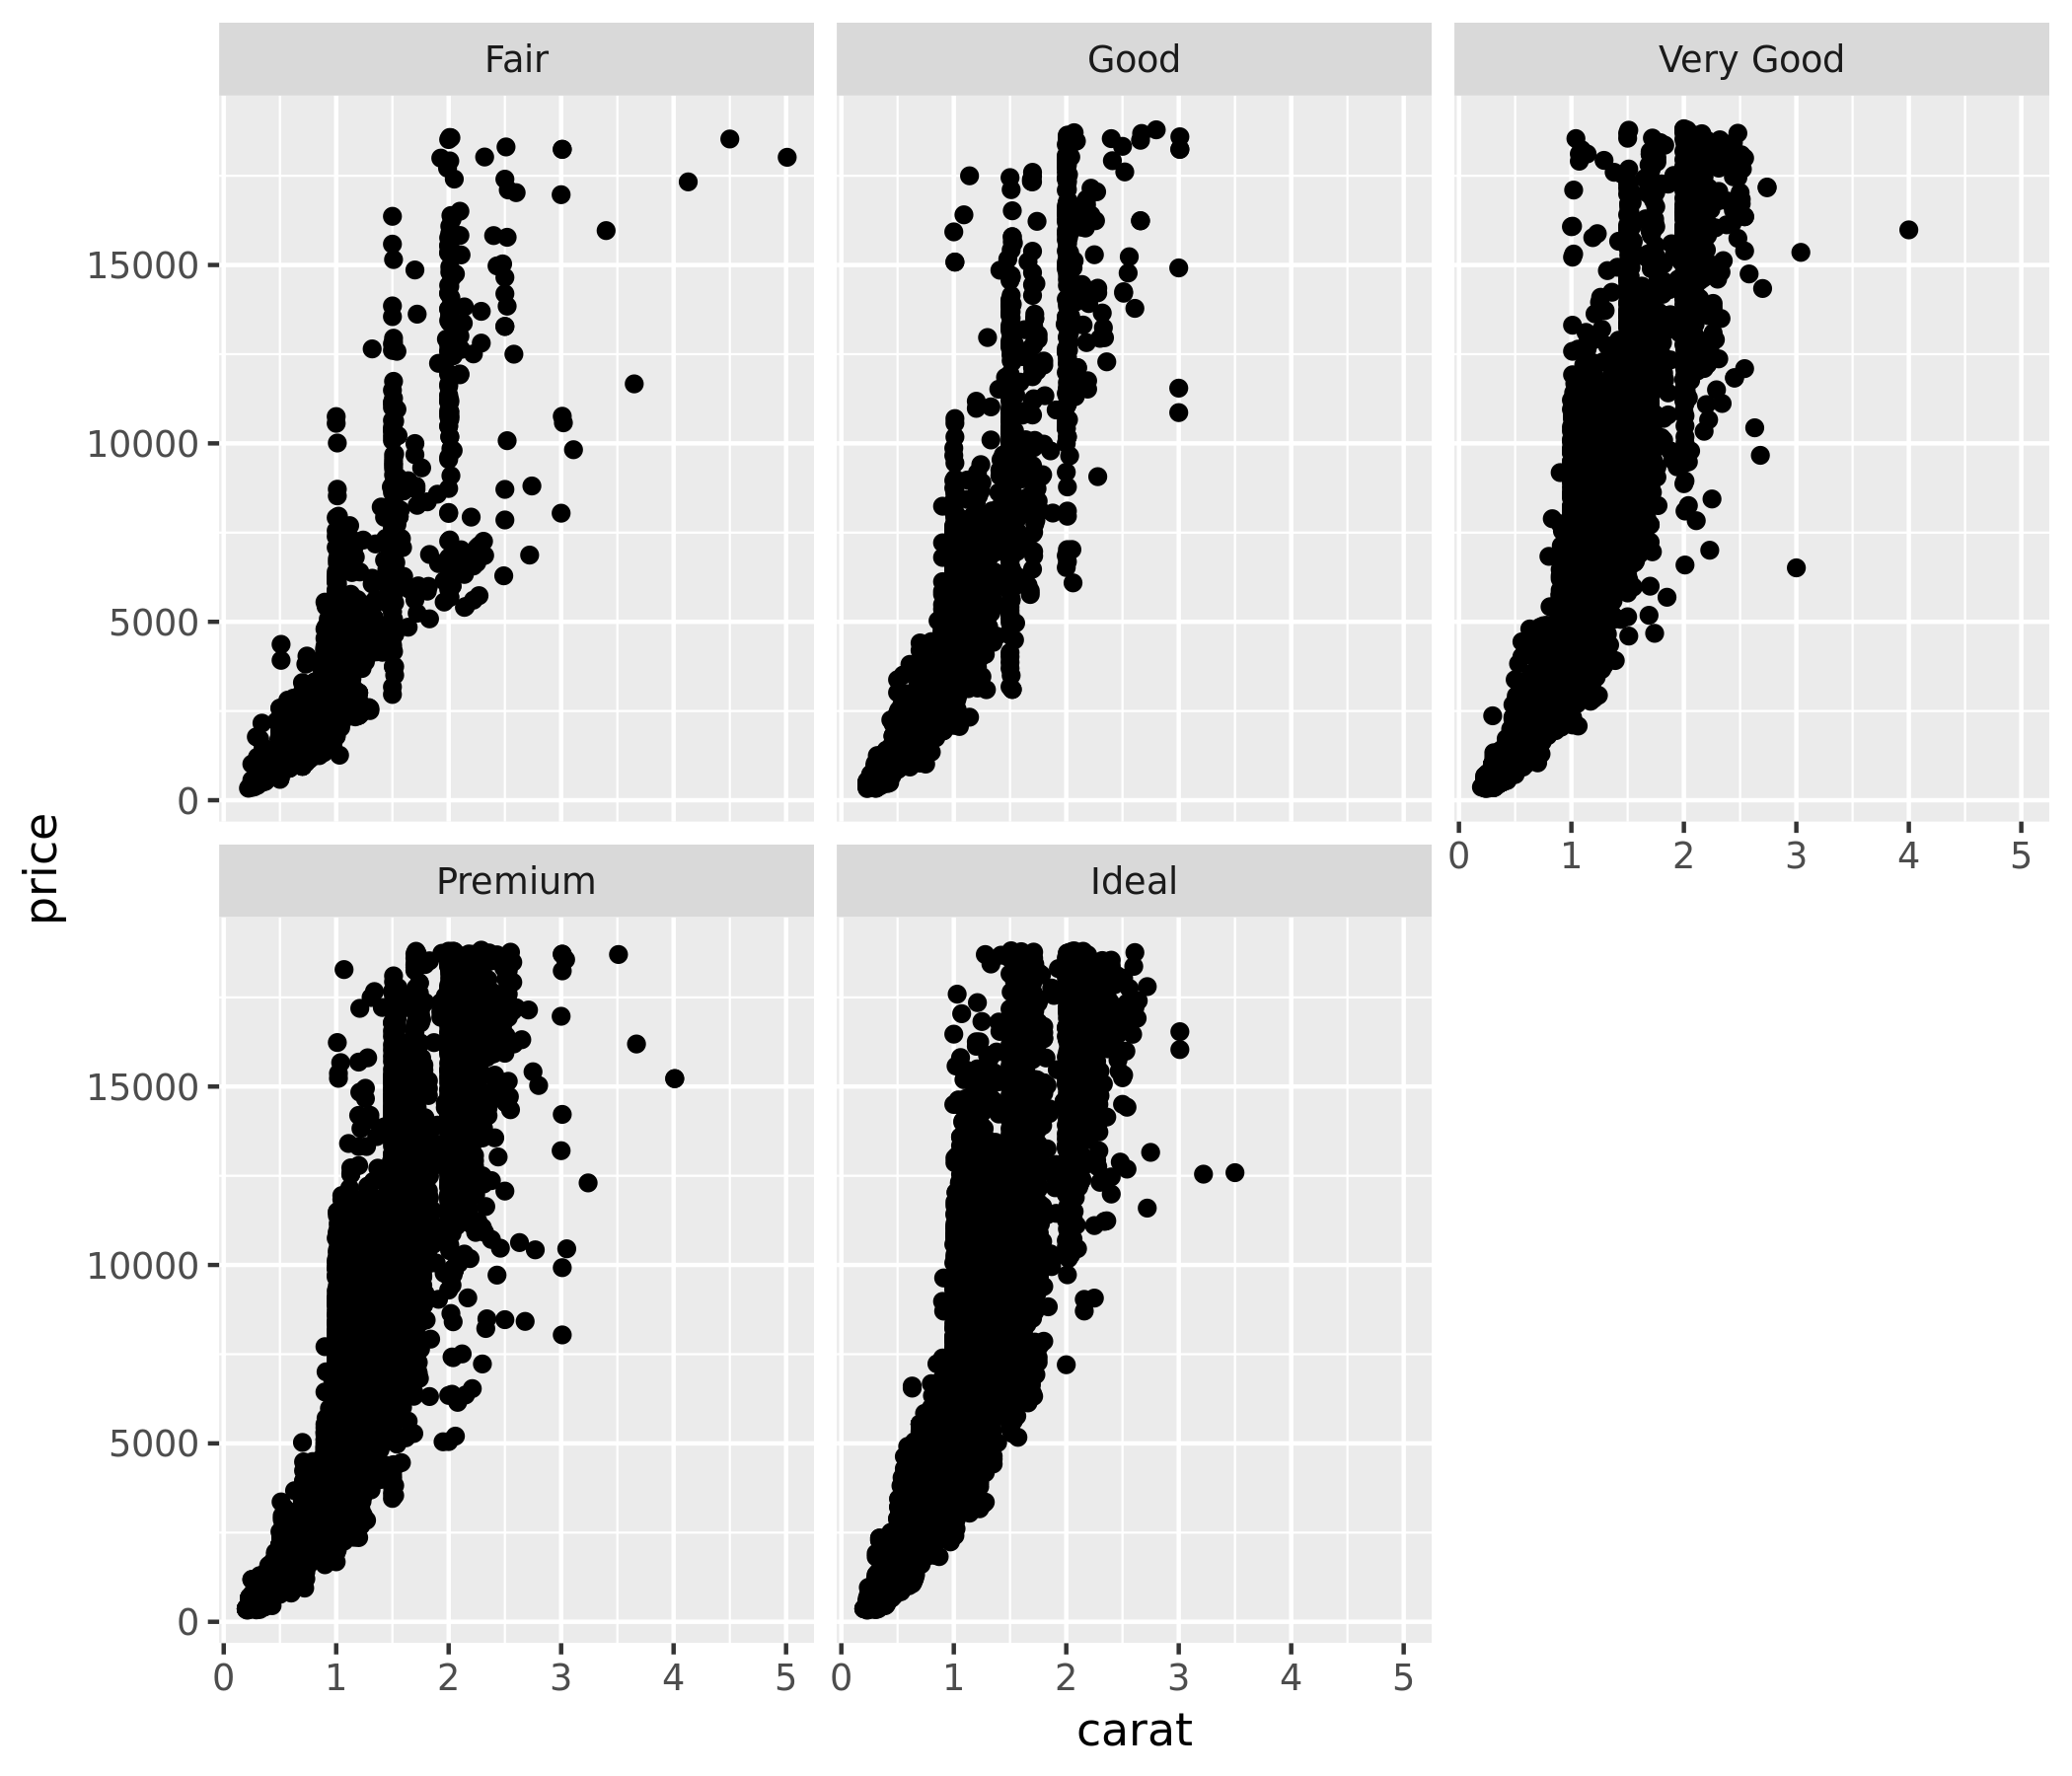

In [18]:
options(repr.plot.width=7, repr.plot.height=6)

p = ggplot(diamonds, aes(x = carat, y = price))

p = p + geom_point()

p = p + facet_wrap(vars(cut))

p

#can also do facet_wrap(~cut)

Add a `geom_smooth` to your facetted plot to emphasize the trend in the data.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


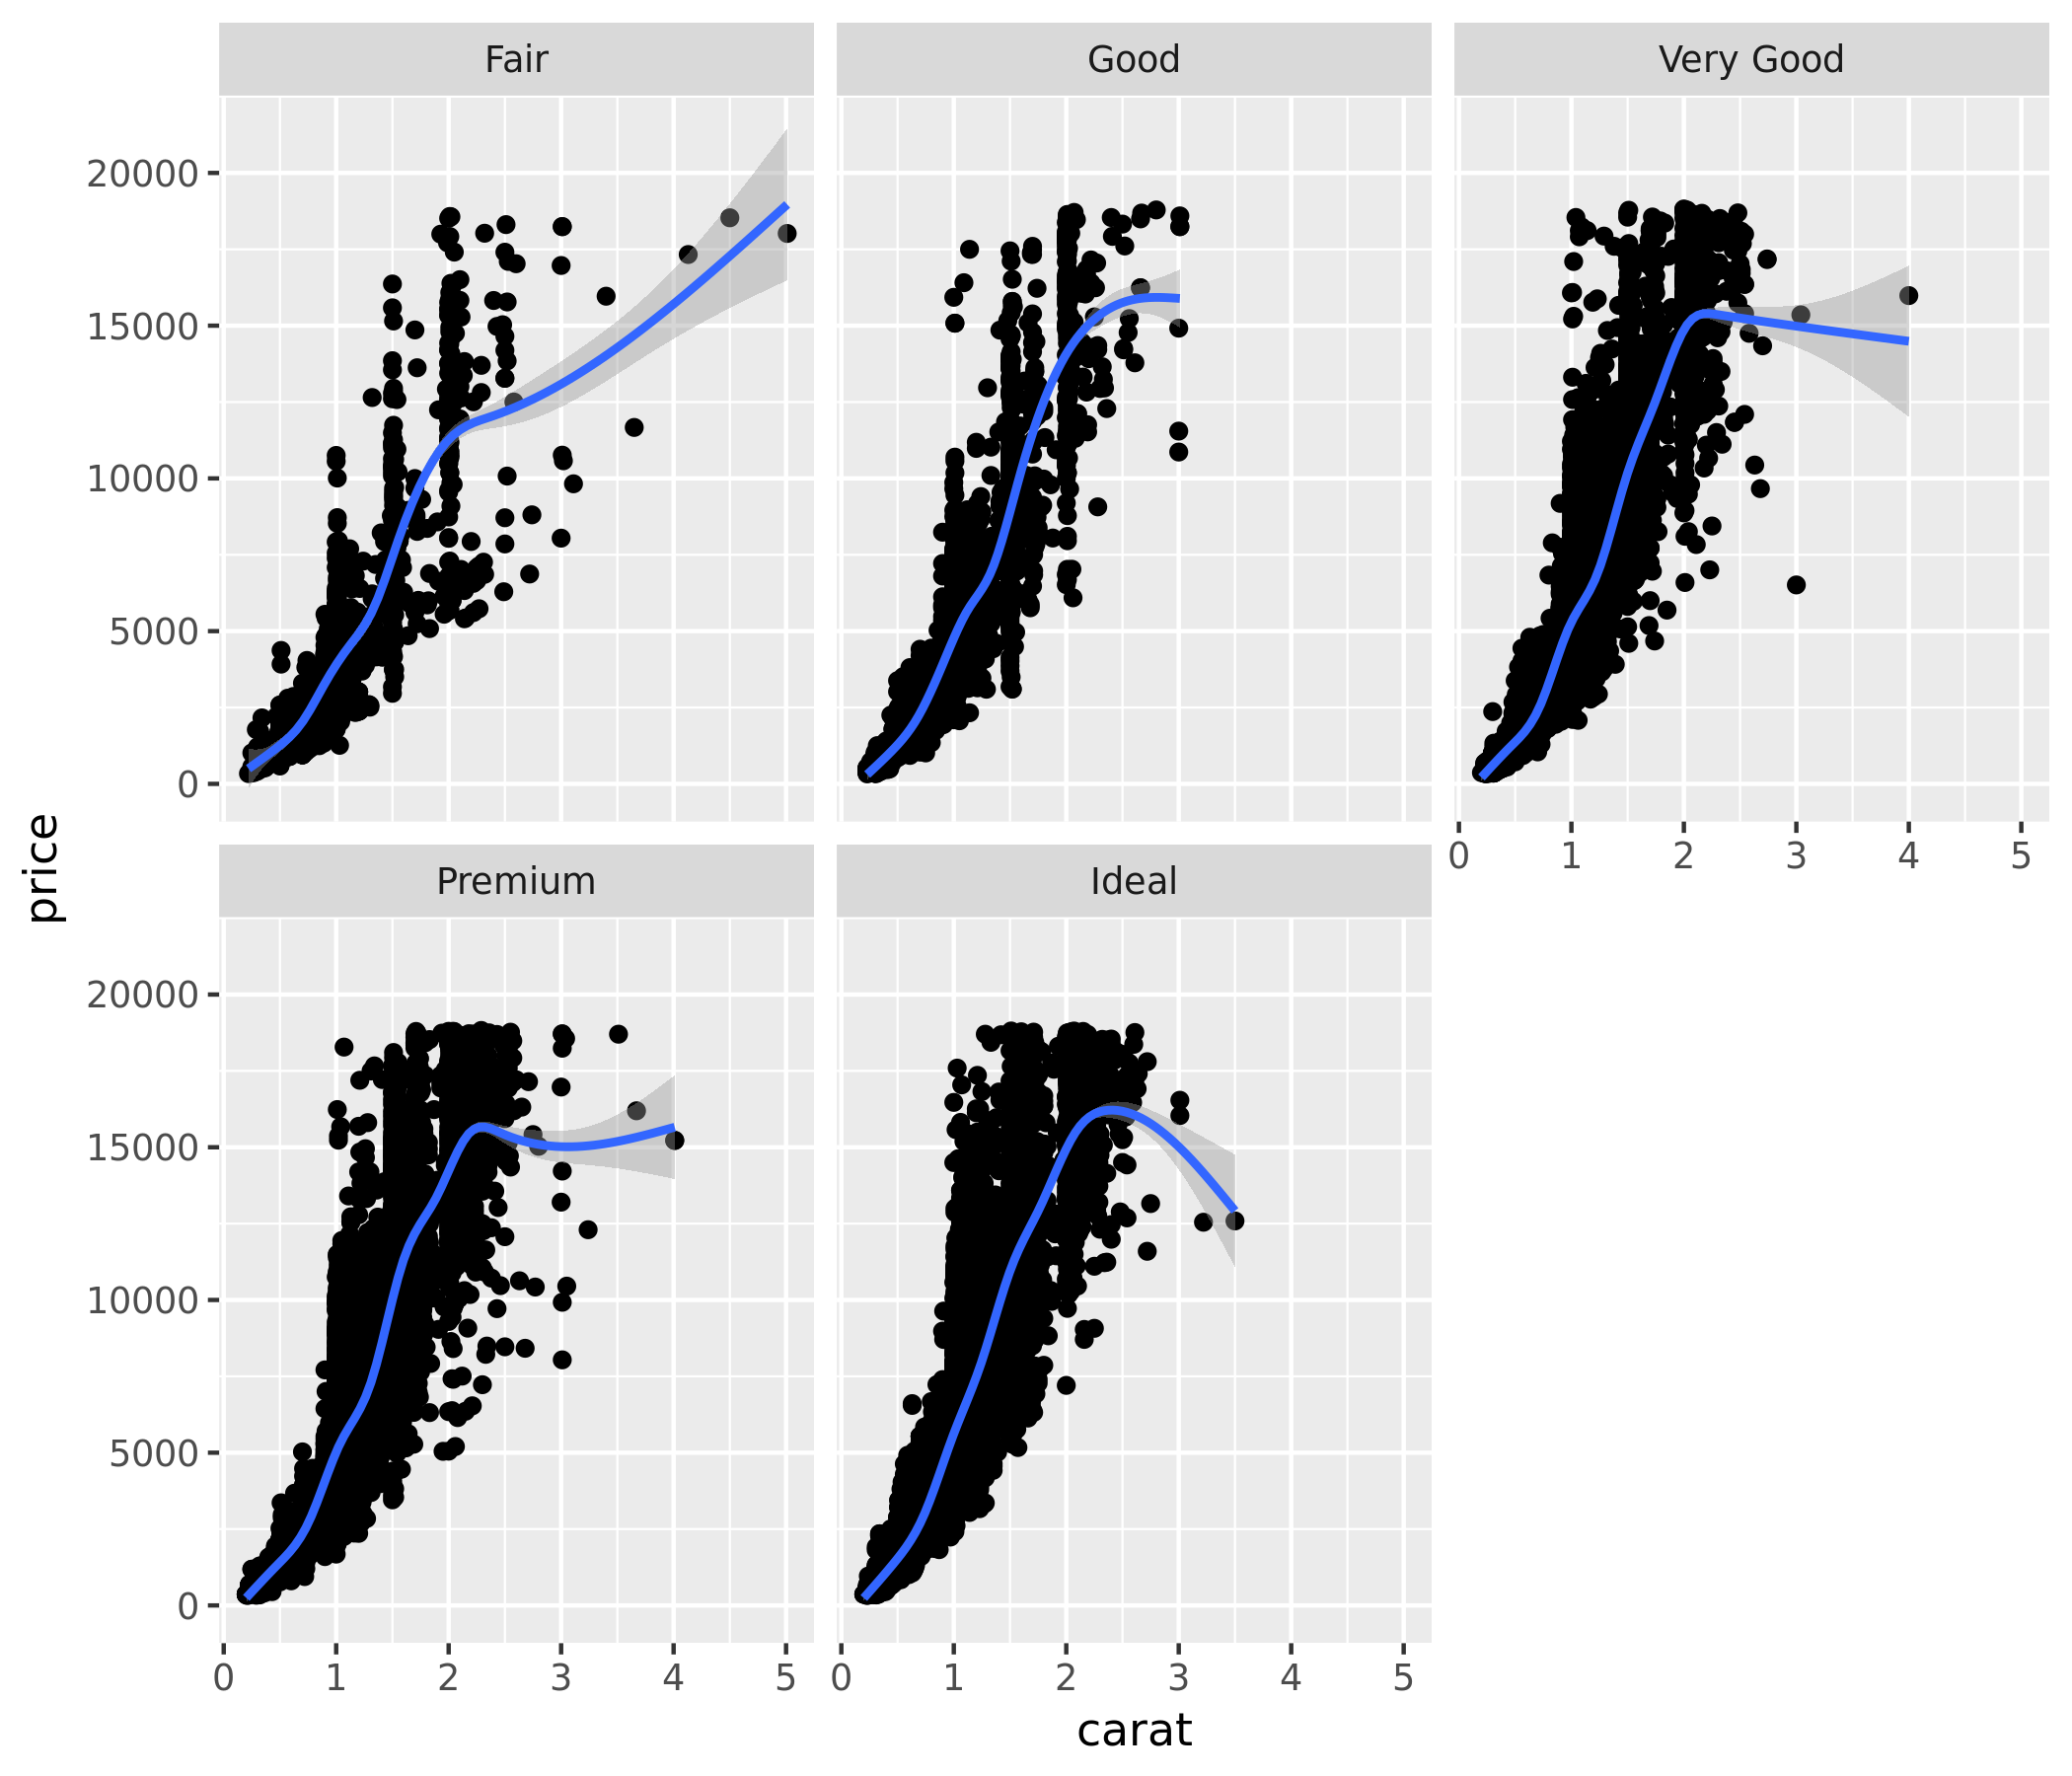

In [19]:
options(repr.plot.width=7, repr.plot.height=6)

p = ggplot(diamonds, aes(x = carat, y = price))

p = p + geom_point()

p = p + geom_smooth()

p = p + facet_wrap(vars(cut))

p